In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "volkswagen_e_golf.csv"
df = pd.read_csv(file_path)

# Show basic info and the first few rows
df_info = df.info()
df_head = df.head()

df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            3345 non-null   object 
 1   model                   3345 non-null   object 
 2   version                 3345 non-null   object 
 3   power(kW)               3345 non-null   int64  
 4   fuel_date               3345 non-null   object 
 5   trip_distance(km)       3344 non-null   object 
 6   quantity(kWh)           3344 non-null   float64
 7   fuel_type               3345 non-null   object 
 8   tire_type               3345 non-null   object 
 9   city                    3345 non-null   int64  
 10  motor_way               3345 non-null   int64  
 11  country_roads           3345 non-null   int64  
 12  driving_style           3345 non-null   object 
 13  consumption(kWh/100km)  3345 non-null   float64
 14  A/C                     3345 non-null   

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [2]:
# Step 1: Clean and preprocess the data

# Convert trip_distance(km) to numeric
df['trip_distance(km)'] = pd.to_numeric(df['trip_distance(km)'], errors='coerce')

# Drop rows with missing values in key columns
key_columns = ['trip_distance(km)', 'quantity(kWh)', 'avg_speed(km/h)']
df_clean = df.dropna(subset=key_columns)

# Select features and target
features = [
    'quantity(kWh)', 'power(kW)', 'consumption(kWh/100km)', 'avg_speed(km/h)',
    'city', 'motor_way', 'country_roads', 'A/C', 'park_heating',
    'ecr_deviation', 'driving_style', 'tire_type'
]
target = 'trip_distance(km)'

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_clean[features], columns=['driving_style', 'tire_type'], drop_first=True)

# Define X and y
X = df_encoded
y = df_clean[target]



X.head()


,quantity(kWh),power(kW),consumption(kWh/100km),avg_speed(km/h),city,motor_way,country_roads,A/C,park_heating,ecr_deviation,driving_style_Moderate,driving_style_Normal,tire_type_Winter tires
1,12.29,85,15.5,47.0,0,0,1,0,1,-1.3,False,True,True
2,8.68,85,18.0,58.0,0,1,1,0,1,1.2,False,True,True
3,1.50,85,16.1,43.0,0,1,1,0,1,-0.7,False,True,True
4,14.44,85,19.0,76.0,0,1,0,0,1,2.2,False,True,True
5,6.84,85,16.1,23.0,1,0,0,0,1,-0.7,False,True,True


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)


(11.781264399735395, np.float64(20.57720654296557), 0.8595935646427819)

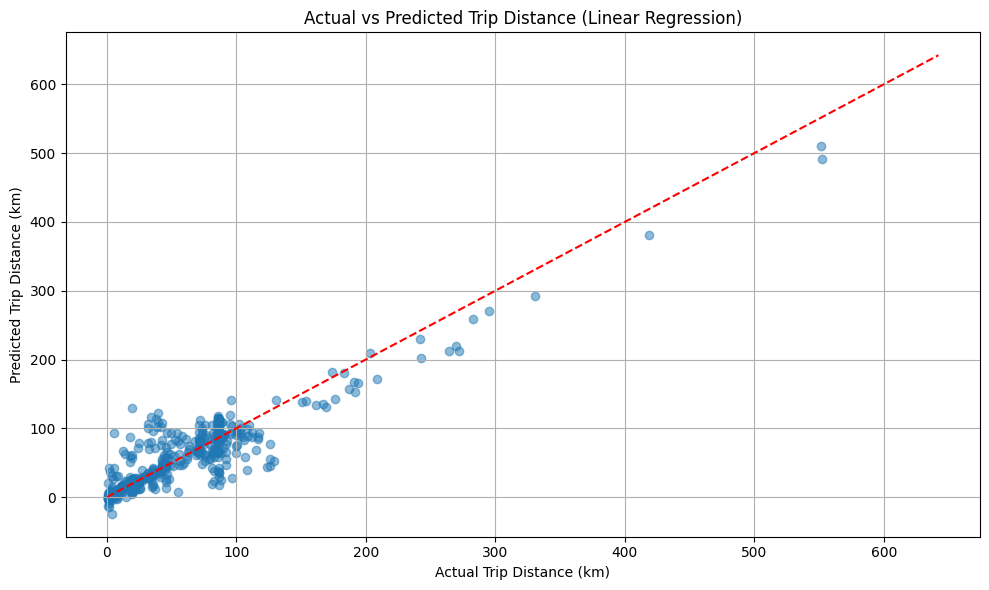

In [4]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Trip Distance (km)')
plt.ylabel('Predicted Trip Distance (km)')
plt.title('Actual vs Predicted Trip Distance (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Calculate the maximum battery capacity observed in the dataset
max_capacity_kwh = df_clean['quantity(kWh)'].max()

# Compute estimated maximum range for each record using the max capacity
df_clean['max_range_estimate_km'] = (100 * max_capacity_kwh) / df_clean['consumption(kWh/100km)']

max_capacity_kwh


C:\Users\serha\AppData\Local\Temp\ipykernel_31644\1255902800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['max_range_estimate_km'] = (100 * max_capacity_kwh) / df_clean['consumption(kWh/100km)']


np.float64(84.6)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a new target for model training: max_range_estimate_km
target_range = df_clean['max_range_estimate_km']

# Reuse and update feature set with encoded categorical variables
features_for_range = df_clean[[
    'quantity(kWh)', 'power(kW)', 'consumption(kWh/100km)', 'avg_speed(km/h)',
    'city', 'motor_way', 'country_roads', 'A/C', 'park_heating', 'ecr_deviation',
    'driving_style', 'tire_type'
]]

# One-hot encode categorical features
features_encoded = pd.get_dummies(features_for_range, columns=['driving_style', 'tire_type'], drop_first=True)

# Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(features_encoded, target_range, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_r, y_train_r)

# Predict and evaluate
y_pred_r = rf_model.predict(X_test_r)
mae_r = mean_absolute_error(y_test_r, y_pred_r)
rmse_r = mean_squared_error(y_test_r, y_pred_r)
r2_r = r2_score(y_test_r, y_pred_r)

(mae_r, rmse_r, r2_r)


(0.6351343176478365, 147.61076652955484, 0.9967084037385859)

C:\Users\serha\AppData\Local\Temp\ipykernel_31644\1117737178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['fixed_range_35_8_km'] = (100 * 35.8) / df_clean['consumption(kWh/100km)']


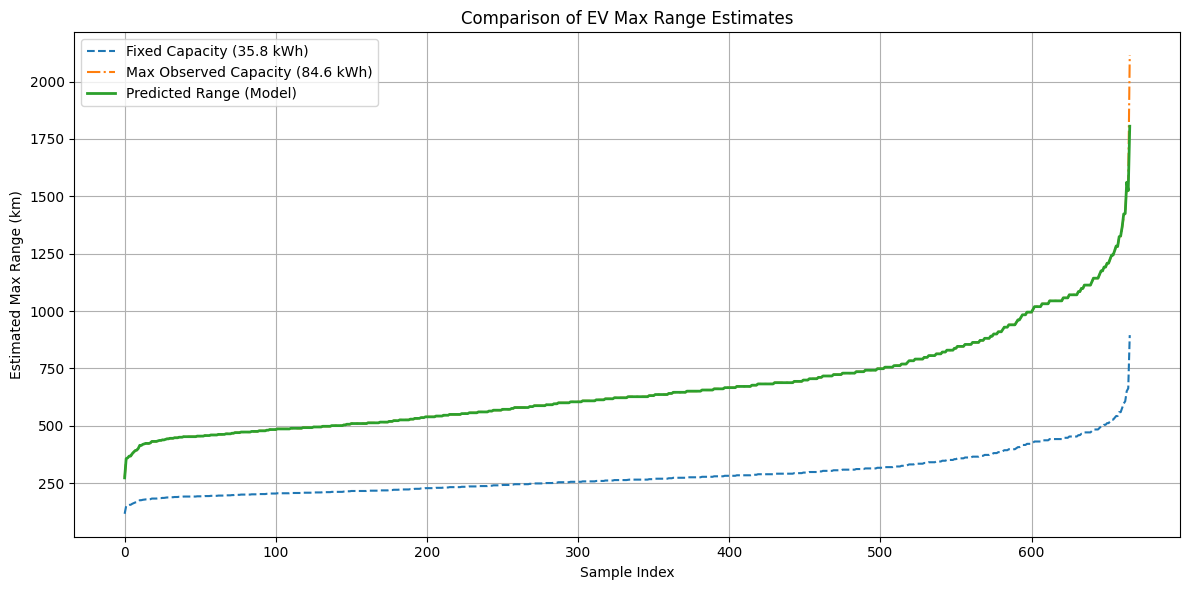

In [13]:
# Calculate fixed battery range (35.8 kWh) for comparison
df_clean['fixed_range_35_8_km'] = (100 * 35.8) / df_clean['consumption(kWh/100km)']

# Add model predictions to the DataFrame
df_clean.loc[X_test_r.index, 'predicted_range_rf'] = y_pred_r

# Plot comparison
plt.figure(figsize=(12, 6))
sample_df = df_clean.loc[X_test_r.index].copy()
sample_df = sample_df.sort_values(by='fixed_range_35_8_km').reset_index(drop=True)

plt.plot(sample_df['fixed_range_35_8_km'], label='Fixed Capacity (35.8 kWh)', linestyle='--')
plt.plot(sample_df['max_range_estimate_km'], label='Max Observed Capacity (84.6 kWh)', linestyle='-.')
plt.plot(sample_df['predicted_range_rf'], label='Predicted Range (Model)', linewidth=2)

plt.title('Comparison of EV Max Range Estimates')
plt.xlabel('Sample Index')
plt.ylabel('Estimated Max Range (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\serha\AppData\Local\Temp\ipykernel_31644\908945848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['fixed_range_35_8_km'] = (100 * 35.8) / df_clean['consumption(kWh/100km)']


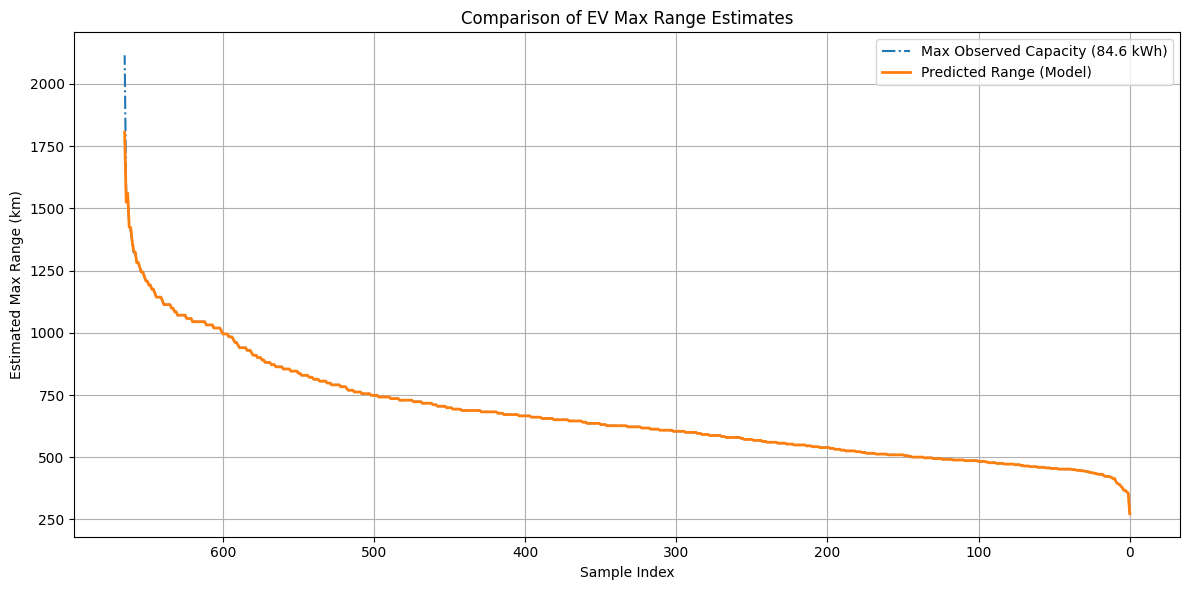

In [19]:
# Calculate fixed battery range (35.8 kWh) for comparison
df_clean['fixed_range_35_8_km'] = (100 * 35.8) / df_clean['consumption(kWh/100km)']

# Add model predictions to the DataFrame
df_clean.loc[X_test_r.index, 'predicted_range_rf'] = y_pred_r

# Plot comparison
plt.figure(figsize=(12, 6))
sample_df = df_clean.loc[X_test_r.index].copy()
sample_df = sample_df.sort_values(by='fixed_range_35_8_km').reset_index(drop=True)

plt.plot(sample_df['fixed_range_35_8_km'], label='Fixed Capacity (35.8 kWh)', linestyle='--')
plt.plot(sample_df['max_range_estimate_km'], label='Max Observed Capacity (84.6 kWh)', linestyle='-.')
plt.plot(sample_df['predicted_range_rf'], label='Predicted Range (Model)', linewidth=2)

plt.title('Comparison of EV Max Range Estimates')
plt.xlabel('Sample Index')
plt.ylabel('Estimated Max Range (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Reverse the x-axis
plt.gca().invert_xaxis()

plt.show()


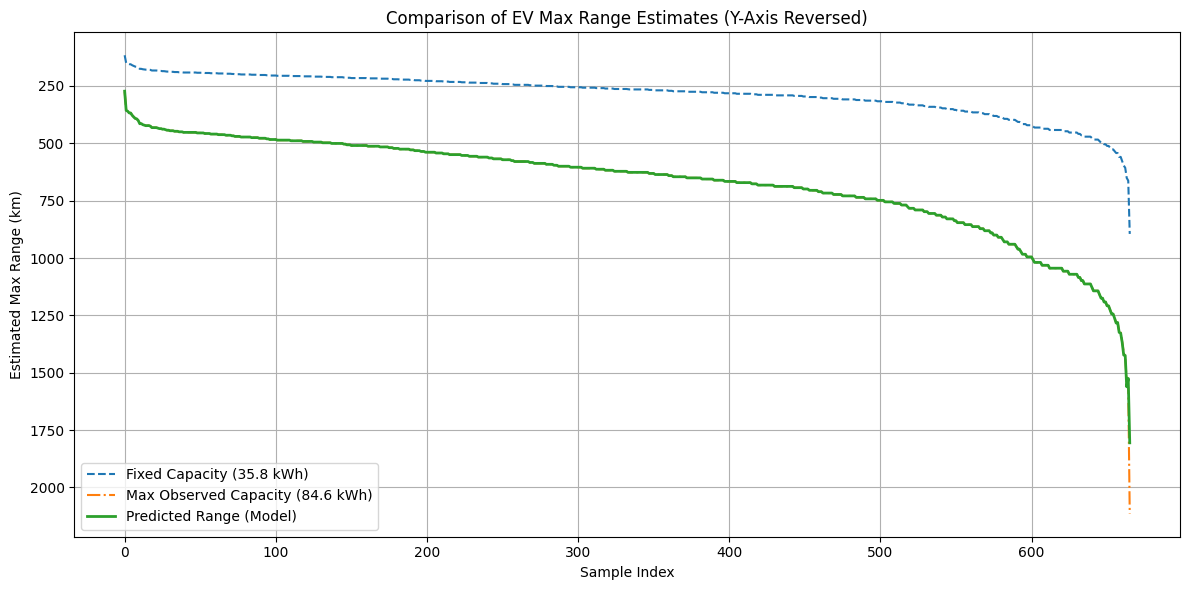

In [9]:
plt.figure(figsize=(12, 6))
sample_df = df_clean.loc[X_test_r.index].copy()
sample_df = sample_df.sort_values(by='fixed_range_35_8_km').reset_index(drop=True)

plt.plot(sample_df['fixed_range_35_8_km'], label='Fixed Capacity (35.8 kWh)', linestyle='--')
plt.plot(sample_df['max_range_estimate_km'], label='Max Observed Capacity (84.6 kWh)', linestyle='-.')
plt.plot(sample_df['predicted_range_rf'], label='Predicted Range (Model)', linewidth=2)

plt.title('Comparison of EV Max Range Estimates (Y-Axis Reversed)')
plt.xlabel('Sample Index')
plt.ylabel('Estimated Max Range (km)')
plt.legend()
plt.grid(True)

# Reverse Y-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()